In [ ]:
from  google.colab import files
uploaded = files.upload()

Saving salesweekly.csv to salesweekly.csv


Naive Forecasting


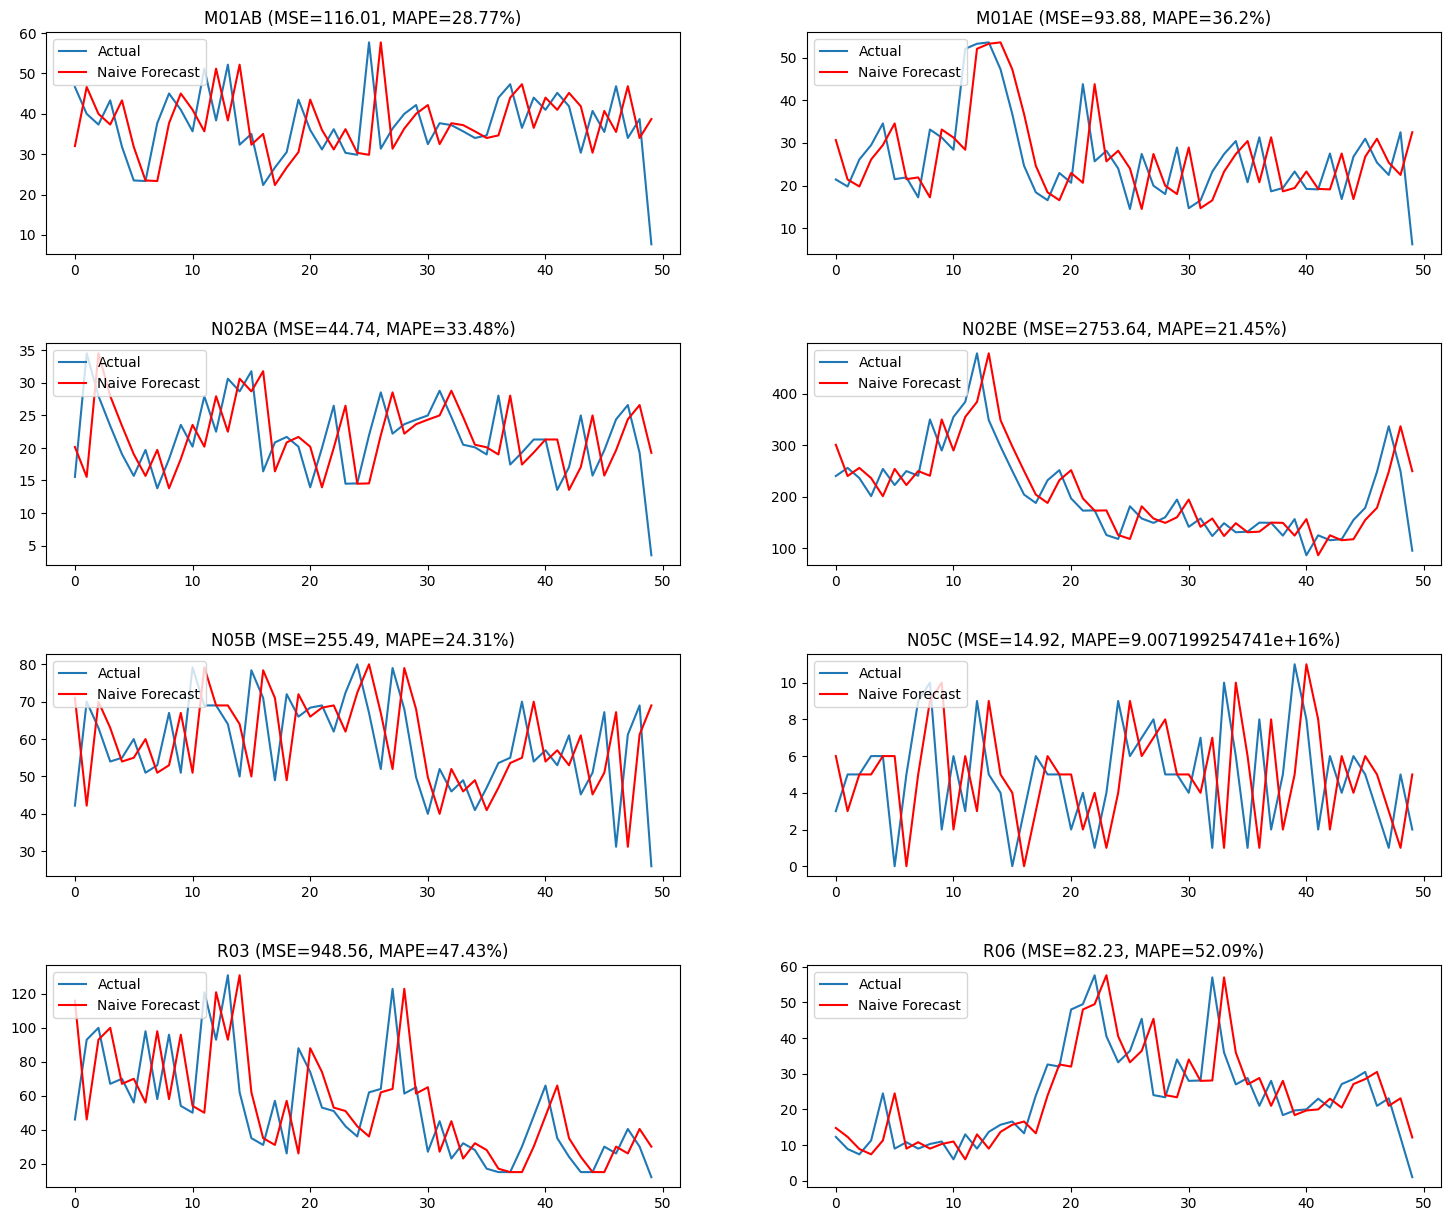

                 M01AB      M01AE      N02BA        N02BE        N05B  \
Naive MSE   116.014866  93.875126  44.741150  2753.643864  255.485600   
Naive MAPE    0.287657   0.362030   0.334758     0.214516    0.243087   

                    N05C         R03        R06  
Naive MSE   1.492000e+01  948.560347  82.228700  
Naive MAPE  9.007199e+14    0.474326   0.520945  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas import concat
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


df = pd.read_csv('salesweekly.csv')


resultsRollingdf = pd.DataFrame()
subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)


for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex = math.floor(subplotindex/numcols)
    colindex = subplotindex % numcols


    ds = df[x]


    dataframe = concat([ds.shift(1), ds], axis=1)
    dataframe.columns = ['t-1', 't']


    size = len(dataframe) - 50
    train, test = dataframe[0:size], dataframe[size:]

    predictions = test['t-1']
    actual = test['t']


    mse = mean_squared_error(actual, predictions)
    mape = mean_absolute_percentage_error(actual, predictions)

    resultsRollingdf.loc['Naive MSE', x] = mse
    resultsRollingdf.loc['Naive MAPE', x] = mape


    ax[rowindex, colindex].set_title(f"{x} (MSE={round(mse,2)}, MAPE={round(mape*100,2)}%)")
    ax[rowindex, colindex].plot(actual.values, label="Actual")
    ax[rowindex, colindex].plot(predictions.values, color='red', label="Naive Forecast")
    ax[rowindex, colindex].legend(loc='upper left')

    subplotindex += 1

plt.show()

print(resultsRollingdf)


In [ ]:
 Seasonal Naive forecasting

Only take three types of drugs, beacuse it has the below the seasonality analyis attached
N02BE','R03','R06-> it has the peak sale for particular range of month,analysis by seasonality analysis


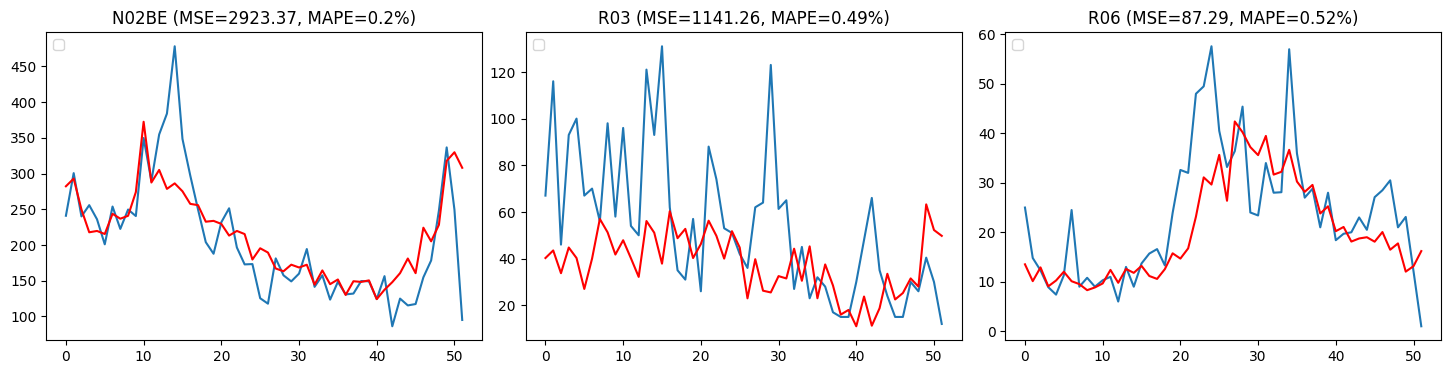

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
df = pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=1
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,4))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['N02BE','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-52
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*52)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Seasonal Naive MSE',x]=error
    resultsRollingdf.loc['Seasonal Naive MAPE',x]=perror
    ax[colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[colindex].plot(test)
    ax[colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

 Seasonality analysis


In [ ]:
from  google.colab import files
uploaded = files.upload()

Saving salesdaily.csv to salesdaily.csv


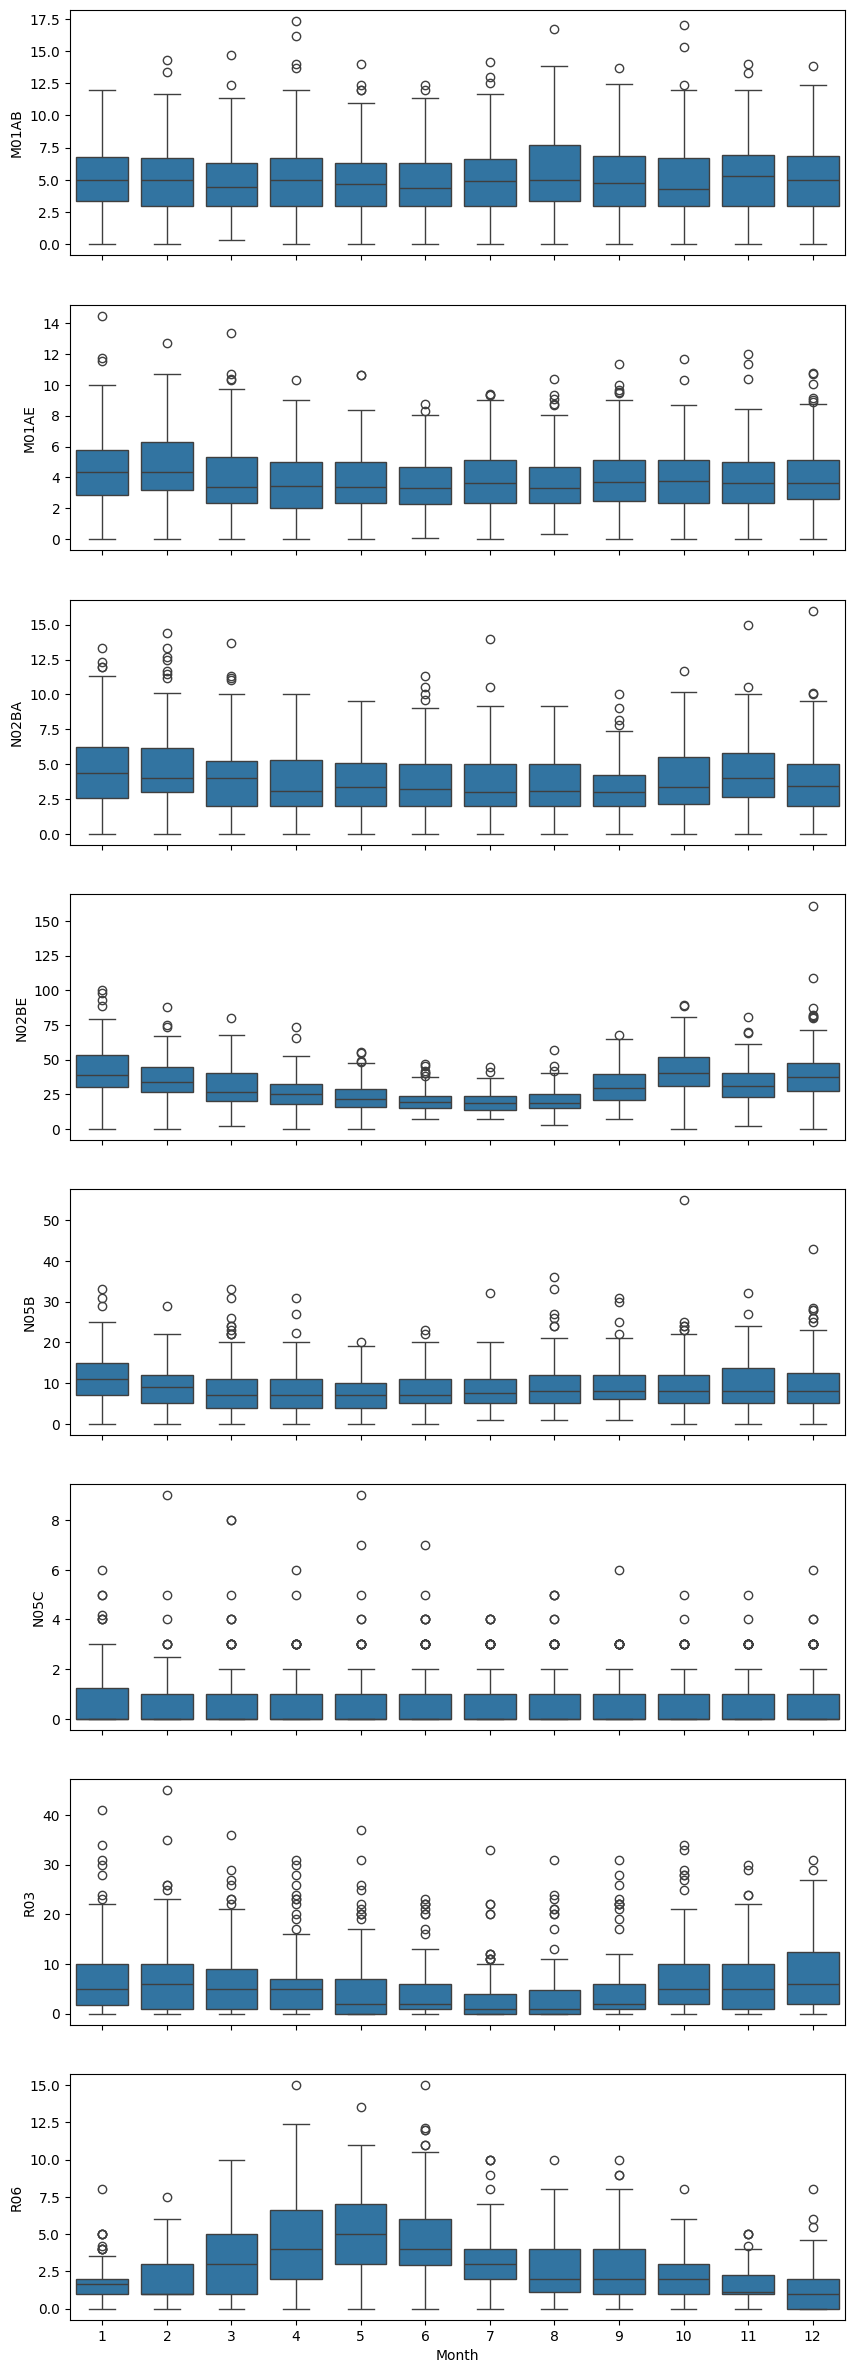

In [ ]:
import seaborn as sns
dfatc_daily = pd.read_csv('salesdaily.csv')
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=dfatc_daily, x='Month', y=name, ax=ax)

Below, boxplots on a weekly scale are shown, for the purpose of exploring the weakly seasonality. Some weekly seasonality is visible.


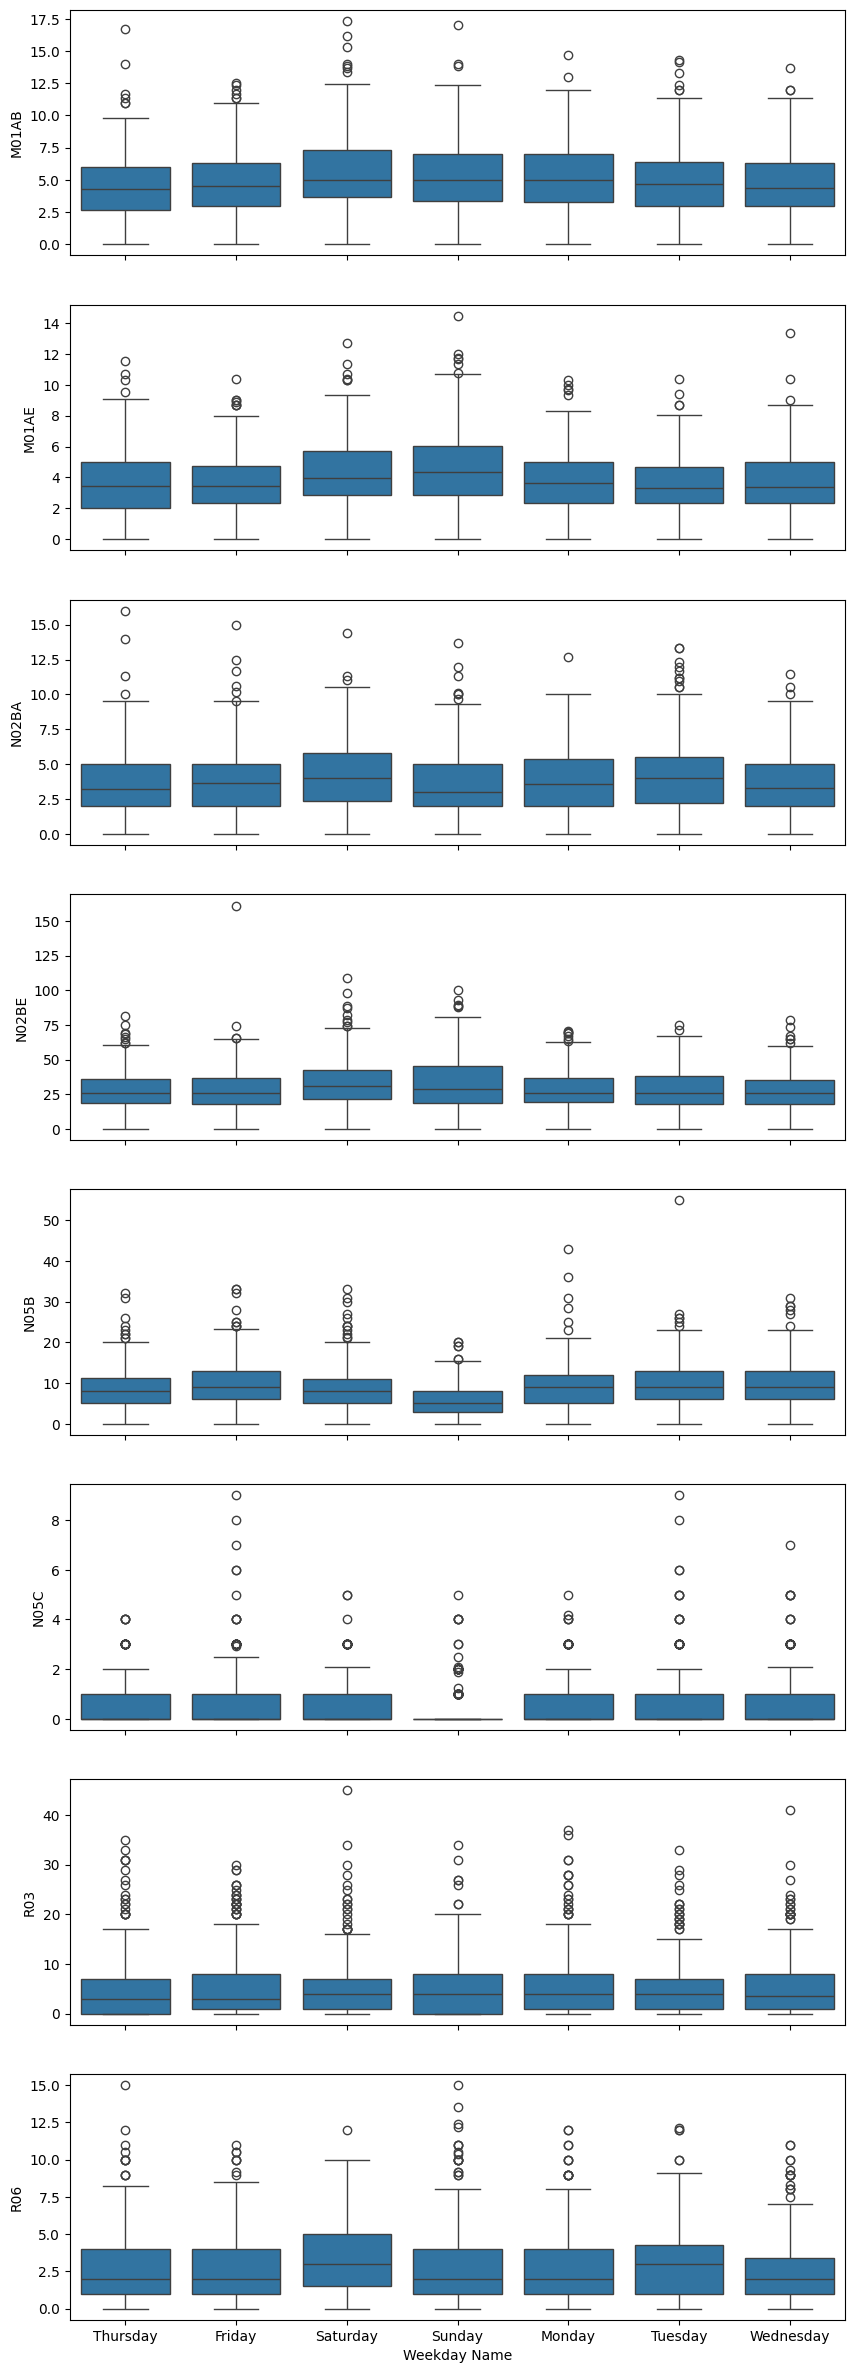

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=dfatc_daily, x='Weekday Name', y=name, ax=ax)


 Seasonal Naive forecasting

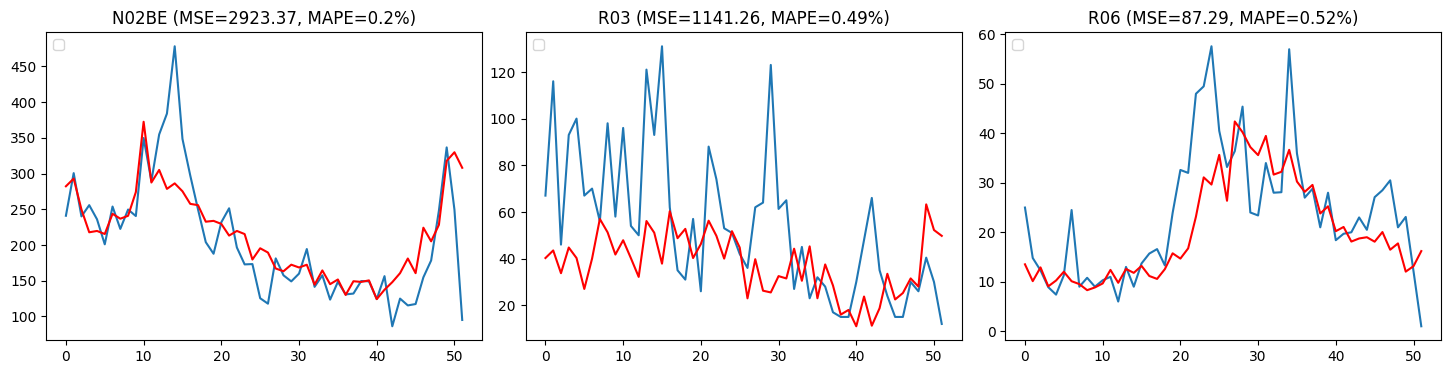

In [ ]:
df = pd.read_csv('/content/salesweekly.csv')
subplotindex=0
numrows=1
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,4))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['N02BE','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-52
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*52)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Seasonal Naive MSE',x]=error
    resultsRollingdf.loc['Seasonal Naive MAPE',x]=perror
    ax[colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[colindex].plot(test)
    ax[colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Stationarity analysis

In [ ]:
from  google.colab import files
uploaded = files.upload()

Saving salesweekly.csv to salesweekly.csv


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('salesweekly.csv')

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(
            k, v, "not" if v < dftest[0] else "", 100-int(k[:-1])
        ))


ADF test for M01AB
-----------------------------
Test statistic = -3.700
P-value = 0.022
Critical values :
	1%: -3.9897903649837616 - The data is not stationary with 99% confidence
	5%: -3.425478311521626 - The data is  stationary with 95% confidence
	10%: -3.1358607194990724 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -8.717
P-value = 0.000
Critical values :
	1%: -3.98926783537037 - The data is  stationary with 99% confidence
	5%: -3.425226747185185 - The data is  stationary with 95% confidence
	10%: -3.1357131066666666 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -2.670
P-value = 0.249
Critical values :
	1%: -3.990441532957606 - The data is not stationary with 99% confidence
	5%: -3.425791763669738 - The data is not stationary with 95% confidence
	10%: -3.1360446341572343 - The data is not stationary with 90% confidence
ADF test for N02BE
------------

In [ ]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import kpss

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/salesweekly.csv')

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    print(" > Is "+x+" data stationary ?")

    # Fix log issue
    series = np.log(df[x] + 1)   # avoids log(0) issue
    series = series.dropna()     # drop NaNs if any

    dftest = kpss(series, regression='ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))


 > Is M01AB data stationary ?
Test statistic = 0.469
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is M01AE data stationary ?
Test statistic = 0.343
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BA data stationary ?
Test statistic = 0.234
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BE data stationary ?
Test statistic = 0.095
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05B data stationary ?
Test statistic = 0.197
P-value = 0.017
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05C data stationary ?
Test statistic = 0.268
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R03 data stationary ?
Test statistic = 0.054
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R06 data stationary ?
Test statistic = 0.032
P-value = 0.100

In [ ]:
import warnings
import pandas as pd
from statsmodels.tsa.stattools import kpss

warnings.filterwarnings("ignore")

df = pd.read_csv('salesweekly.csv')

def check_stationarity(series, name):
    statistic, p_value, lags, crit = kpss(series, regression='c')
    print(f" > Is {name} data stationary ?")
    print(f"   Test Statistic = {statistic:.3f}")
    print(f"   P-value = {p_value:.3f}")
    if p_value > 0.05:
        print("   Stationary\n")
    else:
        print("   Not Stationary\n")

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    check_stationarity(df[x].dropna(), x)


 > Is M01AB data stationary ?
   Test Statistic = 0.747
   P-value = 0.010
   Not Stationary

 > Is M01AE data stationary ?
   Test Statistic = 0.251
   P-value = 0.100
   Stationary

 > Is N02BA data stationary ?
   Test Statistic = 2.039
   P-value = 0.010
   Not Stationary

 > Is N02BE data stationary ?
   Test Statistic = 0.100
   P-value = 0.100
   Stationary

 > Is N05B data stationary ?
   Test Statistic = 0.524
   P-value = 0.036
   Not Stationary

 > Is N05C data stationary ?
   Test Statistic = 0.223
   P-value = 0.100
   Stationary

 > Is R03 data stationary ?
   Test Statistic = 0.892
   P-value = 0.010
   Not Stationary

 > Is R06 data stationary ?
   Test Statistic = 0.268
   P-value = 0.100
   Stationary



In [ ]:
import statsmodels.api as sm
df = pd.read_csv('salesweekly.csv')
warnings.filterwarnings("ignore")
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    resDiff = sm.tsa.arma_order_select_ic(df[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,M01AB) = (np.int64(3), np.int64(3)) is the best.
ARMA(p,q,M01AE) = (np.int64(2), np.int64(0)) is the best.
ARMA(p,q,N02BA) = (np.int64(3), np.int64(3)) is the best.
ARMA(p,q,N02BE) = (np.int64(2), np.int64(1)) is the best.
ARMA(p,q,N05B) = (np.int64(4), np.int64(3)) is the best.
ARMA(p,q,N05C) = (np.int64(3), np.int64(2)) is the best.
ARMA(p,q,R03) = (np.int64(1), np.int64(1)) is the best.
ARMA(p,q,R06) = (np.int64(2), np.int64(2)) is the best.
